In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os 


# MovieLens数据处理

## 数据读取

In [2]:
!tree 

.
├── data
│   ├── movies.dat
│   ├── ratings.dat
│   ├── README
│   └── users.dat
├── imgs
└── 数据处理.ipynb

2 directories, 5 files


In [3]:
movies = pd.read_table("./data/movies.dat", sep="::", engine="python"
                       , header=None
                       , names=["movie_id", "title", "genres"]
                      )
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# 有三千多部电影
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [5]:
users = pd.read_table("./data/users.dat", sep="::", engine="python"
                      , header=None
                      , names=["user_id", "gender", "age", "occupation", "zip"]
                     )
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
# 共有六千多用户
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip         6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [7]:
ratings = pd.read_table("./data/ratings.dat", sep="::", engine="python"
                        , header=None
                        , names=["user_id", "movie_id", "rating", "timestamp"]
                       )
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
# 一百万的评分记录日志
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [9]:
# 合并所有数据
all_data = pd.merge(pd.merge(ratings, users), movies, on="movie_id")
all_data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [10]:
# 每一位用户的点击，按照时间顺序排列
all_data = all_data.sort_values(by=["user_id", "timestamp"])
all_data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
34073,1,3186,4,978300019,F,1,10,48067,"Girl, Interrupted (1999)",Drama
23270,1,1270,5,978300055,F,1,10,48067,Back to the Future (1985),Comedy|Sci-Fi
31152,1,1721,4,978300055,F,1,10,48067,Titanic (1997),Drama|Romance
37339,1,1022,5,978300055,F,1,10,48067,Cinderella (1950),Animation|Children's|Musical
28157,1,2340,3,978300103,F,1,10,48067,Meet Joe Black (1998),Romance


In [11]:
# 各个字段的可能的取值

def get_feat_nunique(df):

    feat_nunique = {}
    for name in df.columns:
        try:
            feat_nunique[name] = df[name].nunique()
        except:
            print(name + "不支持统计！")
    
    return pd.DataFrame(feat_nunique, index=["nunique"])  

In [12]:
get_feat_nunique(all_data).head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
nunique,6040,3706,5,458455,2,7,21,3439,3706,301


In [13]:
# 离散数据：LabEncoder, 连续数据：MinMaxScalar

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from random import sample

# 连续
dense_feats = ["timestamp"]
MMS = MinMaxScaler()
for name in dense_feats:
    all_data[name] = MMS.fit_transform(all_data[[name]])

# 离散
spase_feats = ["user_id", "movie_id", "gender", "age", "occupation", "zip"]
LE = LabelEncoder()
for name in spase_feats:
    all_data[name] = LE.fit_transform(all_data[[name]])

/home/gavin/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
# 获取用户历史观看视频

def get_user_hist_beavior(df):
    """
    df: 用户数据
    """
    
    user_hist_data = pd.DataFrame(df.groupby("user_id")["movie_id"].agg({list})["list"].map(lambda x: x[-50:])).reset_index()
    user_hist_data["hist_len"] = user_hist_data["list"].map(lambda x: len(x))
    user_hist_data["seq_length"] = user_hist_data["hist_len"].map(lambda x: x)
    user_hist_data.rename(columns = {"list": "hist_movie_id"}, inplace = True)
    df = df.merge(user_hist_data, how="left", on="user_id")
    
    return df

In [15]:
all_data = get_user_hist_beavior(df=all_data)
all_data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,hist_movie_id,hist_len,seq_length
0,0,2969,4,0.240623,0,0,10,1588,"Girl, Interrupted (1999)",Drama,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50
1,0,1178,5,0.240624,0,0,10,1588,Back to the Future (1985),Comedy|Sci-Fi,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50
2,0,1574,4,0.240624,0,0,10,1588,Titanic (1997),Drama|Romance,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50
3,0,957,5,0.240624,0,0,10,1588,Cinderella (1950),Animation|Children's|Musical,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50
4,0,2147,3,0.240624,0,0,10,1588,Meet Joe Black (1998),Romance,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50


In [16]:
def get_neg_click(data_df, neg_num = 0):
    """
    负采样, 1:1 正负样本采样
    data_df: 数据集
    neg_num: 负样本个数
    """
    
    movies_np = data_df["hist_movie_id"].values
    movies_list =[]
    for movie in movies_np:
        movies_list.extend(movie)
    
    # 去重
    movies_set = set(movies_list)
    neg_movies_list = []
    
    for movies in movies_np:
        hist_movies = set(movie)
        #　用户未点击的样本作为负样本
        neg_movies_set = movies_set - hist_movies
        # 采样指定个数的负样本（保证和用户序列长度相同）
        neg_movies = sample(neg_movies_set, neg_num)
        neg_movies_list.append(list(neg_movies))
    
    return pd.Series(neg_movies_list)

In [17]:
all_data["neg_hist_movie_id"] = get_neg_click(data_df=all_data, neg_num=50)
all_data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,hist_movie_id,hist_len,seq_length,neg_hist_movie_id
0,0,2969,4,0.240623,0,0,10,1588,"Girl, Interrupted (1999)",Drama,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50,"[650, 863, 3083, 3505, 3277, 3670, 2569, 1755,..."
1,0,1178,5,0.240624,0,0,10,1588,Back to the Future (1985),Comedy|Sci-Fi,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50,"[2651, 2857, 1638, 1140, 2756, 2138, 3620, 304..."
2,0,1574,4,0.240624,0,0,10,1588,Titanic (1997),Drama|Romance,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50,"[2020, 60, 2863, 116, 3031, 861, 2100, 1091, 3..."
3,0,957,5,0.240624,0,0,10,1588,Cinderella (1950),Animation|Children's|Musical,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50,"[2957, 2932, 1028, 1177, 2555, 1032, 1976, 312..."
4,0,2147,3,0.240624,0,0,10,1588,Meet Joe Black (1998),Romance,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50,"[804, 715, 948, 2487, 3624, 330, 528, 657, 845..."


In [18]:
# label构建
all_data["label"] = all_data["rating"].map(lambda x: 1 if x > 3 else 0)
all_data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,hist_movie_id,hist_len,seq_length,neg_hist_movie_id,label
0,0,2969,4,0.240623,0,0,10,1588,"Girl, Interrupted (1999)",Drama,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50,"[650, 863, 3083, 3505, 3277, 3670, 2569, 1755,...",1
1,0,1178,5,0.240624,0,0,10,1588,Back to the Future (1985),Comedy|Sci-Fi,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50,"[2651, 2857, 1638, 1140, 2756, 2138, 3620, 304...",1
2,0,1574,4,0.240624,0,0,10,1588,Titanic (1997),Drama|Romance,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50,"[2020, 60, 2863, 116, 3031, 861, 2100, 1091, 3...",1
3,0,957,5,0.240624,0,0,10,1588,Cinderella (1950),Animation|Children's|Musical,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50,"[2957, 2932, 1028, 1177, 2555, 1032, 1976, 312...",1
4,0,2147,3,0.240624,0,0,10,1588,Meet Joe Black (1998),Romance,"[957, 2147, 1658, 3177, 2599, 1117, 1104, 689,...",50,50,"[804, 715, 948, 2487, 3624, 330, 528, 657, 845...",0


In [22]:
from deepctr_torch.inputs import SparseFeat, VarLenSparseFeat, DenseFeat
from deepctr_torch.inputs import get_feature_names
from deepctr_torch.models import DIEN
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
## 编码信息
# 编码
def get_feats_columns_info(df, spase_columns, dense_columns, behavior_feat, his_behavior_fea, embed_dim=8, max_len=50, DIEN=False):
    """
    获取特征编码信息
    df: 数据集
    spase_columns: 稀疏特征, list
    dense_columns： 稠密特征, list
    behavior_feat： 候选物品
    embed_dim： embedding维度
    maxlen: 序列最大长度
    """
    
    behavior_feature_list = behavior_feat
    feature_columns = []
    
    # SpaseFeat
    for feat_name in spase_columns:
        feature_columns.append(SparseFeat(feat_name, max(df[feat_name]) + 1, embedding_dim=8))

    # DenseFeat
    for name in dense_columns:
        feature_columns.append(DenseFeat(name = name, dimension = 1))

    # VarLenSpaseFeat
    # 用户历史记录
    for hist_name in behavior_feature_list:
        feature_columns.append(VarLenSparseFeat(SparseFeat("hist_" + hist_name
                                                           , vocabulary_size = max(df[hist_name]) + 1
                                                           , embedding_dim = embed_dim
                                                           , embedding_name = hist_name
                                                          )
                                                , maxlen = max_len
                                                , length_name = "seq_length")
                              )
        if DIEN:
            # 负采样
            feature_columns.append(VarLenSparseFeat(SparseFeat("neg_hist_" + hist_name
                                                               , vocabulary_size = max(df[hist_name]) + 1
                                                               , embedding_dim = embed_dim
                                                               , embedding_name = hist_name
                                                              )
                                                    , maxlen = max_len
                                                    , length_name = "seq_length")
                                  )
    # 写入数值信息
    x = {}
    for name in get_feature_names(feature_columns):
        
        if name in his_behavior_fea:
            # 每一位用户的行为序列编码
            his_list = [l for l in df[name]]
            x[name] = pad_sequences(his_list, maxlen=max_len, padding='post')      # 二维数组
        else:
            x[name] = df[name].values

    
    return feature_columns, x

In [34]:
feature_columns, X = get_feats_columns_info(all_data
                                            , spase_columns=spase_feats
                                            , dense_columns=dense_feats+["hist_len"]
                                            , behavior_feat=["movie_id"]
                                            , his_behavior_fea=["hist_movie_id", "neg_hist_movie_id"]
                                        )
feature_columns

[SparseFeat(name='user_id', vocabulary_size=6040, embedding_dim=8, use_hash=False, dtype='int32', embedding_name='user_id', group_name='default_group'),
 SparseFeat(name='movie_id', vocabulary_size=3706, embedding_dim=8, use_hash=False, dtype='int32', embedding_name='movie_id', group_name='default_group'),
 SparseFeat(name='gender', vocabulary_size=2, embedding_dim=8, use_hash=False, dtype='int32', embedding_name='gender', group_name='default_group'),
 SparseFeat(name='age', vocabulary_size=7, embedding_dim=8, use_hash=False, dtype='int32', embedding_name='age', group_name='default_group'),
 SparseFeat(name='occupation', vocabulary_size=21, embedding_dim=8, use_hash=False, dtype='int32', embedding_name='occupation', group_name='default_group'),
 SparseFeat(name='zip', vocabulary_size=3439, embedding_dim=8, use_hash=False, dtype='int32', embedding_name='zip', group_name='default_group'),
 DenseFeat(name='timestamp', dimension=1, dtype='float32'),
 DenseFeat(name='hist_len', dimension=1,

In [35]:
X

{'user_id': array([   0,    0,    0, ..., 6039, 6039, 6039]),
 'movie_id': array([2969, 1178, 1574, ..., 1741,  155, 1131]),
 'gender': array([0, 0, 0, ..., 1, 1, 1]),
 'age': array([0, 0, 0, ..., 2, 2, 2]),
 'occupation': array([10, 10, 10, ...,  6,  6,  6]),
 'zip': array([1588, 1588, 1588, ...,  466,  466,  466]),
 'timestamp': array([0.24062316, 0.24062356, 0.24062356, ..., 0.4540416 , 0.45404184,
        0.46363028]),
 'hist_len': array([50, 50, 50, ..., 50, 50, 50]),
 'hist_movie_id': array([[ 957, 2147, 1658, ..., 1439, 1727,   47],
        [ 957, 2147, 1658, ..., 1439, 1727,   47],
        [ 957, 2147, 1658, ..., 1439, 1727,   47],
        ...,
        [3313, 1132, 2711, ..., 1741,  155, 1131],
        [3313, 1132, 2711, ..., 1741,  155, 1131],
        [3313, 1132, 2711, ..., 1741,  155, 1131]], dtype=int32),
 'seq_length': array([50, 50, 50, ..., 50, 50, 50]),
 'neg_hist_movie_id': array([[ 650,  863, 3083, ..., 1717, 2857, 1205],
        [2651, 2857, 1638, ...,  661, 2724,  2

In [26]:
get_feature_names(feature_columns)

['user_id',
 'movie_id',
 'gender',
 'age',
 'occupation',
 'zip',
 'timestamp',
 'hist_len',
 'hist_movie_id',
 'seq_length']

In [40]:
y = all_data["label"].values

### 模型训练和评估

In [28]:
import torch
from deepctr_torch.models import DIN

In [29]:
device = 'cpu'
use_cuda = True
if use_cuda and torch.cuda.is_available():
    print('cuda ready...')
    device = 'cuda:0'

model = DIN(dnn_feature_columns=feature_columns, history_feature_list=["movie_id"], task="binary")
# model = DIEN(dnn_feature_columns=feature_columns, history_feature_list=["movie_id"]
#              , use_negsampling=True
#              , dnn_hidden_units=[4, 4, 4]
#              , gru_type = "AUGRU"
#              , dnn_dropout = 0.6
#              , device=device
#              , task = "regression"
#             )
model

/home/gavin/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


DIN(
  (embedding_dict): ModuleDict(
    (user_id): Embedding(6040, 8)
    (movie_id): Embedding(3706, 8)
    (gender): Embedding(2, 8)
    (age): Embedding(7, 8)
    (occupation): Embedding(21, 8)
    (zip): Embedding(3439, 8)
  )
  (linear_model): Linear(
    (embedding_dict): ModuleDict()
  )
  (out): PredictionLayer()
  (attention): AttentionSequencePoolingLayer(
    (local_att): LocalActivationUnit(
      (dnn): DNN(
        (dropout): Dropout(p=0, inplace=False)
        (linears): ModuleList(
          (0): Linear(in_features=32, out_features=64, bias=True)
          (1): Linear(in_features=64, out_features=16, bias=True)
        )
        (activation_layers): ModuleList(
          (0): Dice(
            (bn): BatchNorm1d(64, eps=1e-08, momentum=0.1, affine=True, track_running_stats=True)
            (sigmoid): Sigmoid()
          )
          (1): Dice(
            (bn): BatchNorm1d(16, eps=1e-08, momentum=0.1, affine=True, track_running_stats=True)
            (sigmoid): Sigmoid

In [30]:
model.compile(optimizer="adam"
              , loss="binary_crossentropy"
              , metrics=["binary_crossentropy", "auc"]
             )

history = model.fit(X, y
                    , batch_size=1024
                    , epochs=10
                    , shuffle=False
                    , verbose=1
                    , validation_split=0.2
                   )

0it [00:00, ?it/s]

cpu
Train on 800167 samples, validate on 200042 samples, 782 steps per epoch


782it [05:38,  2.31it/s]
0it [00:00, ?it/s]

Epoch 1/10
352s - loss:  0.6290 - binary_crossentropy:  0.6290 - auc:  0.7019 - val_binary_crossentropy:  0.6308 - val_auc:  0.7110


782it [04:31,  2.88it/s]
0it [00:00, ?it/s]

Epoch 2/10
287s - loss:  0.5744 - binary_crossentropy:  0.5744 - auc:  0.7581 - val_binary_crossentropy:  0.6006 - val_auc:  0.7220


782it [04:27,  2.93it/s]
0it [00:00, ?it/s]

Epoch 3/10
282s - loss:  0.5610 - binary_crossentropy:  0.5610 - auc:  0.7732 - val_binary_crossentropy:  0.6036 - val_auc:  0.7224


782it [04:36,  2.82it/s]
0it [00:00, ?it/s]

Epoch 4/10
291s - loss:  0.5495 - binary_crossentropy:  0.5495 - auc:  0.7805 - val_binary_crossentropy:  0.6090 - val_auc:  0.7225


782it [04:38,  2.80it/s]
0it [00:00, ?it/s]

Epoch 5/10
295s - loss:  0.5449 - binary_crossentropy:  0.5449 - auc:  0.7830 - val_binary_crossentropy:  0.6053 - val_auc:  0.7231


782it [04:42,  2.77it/s]
0it [00:00, ?it/s]

Epoch 6/10
297s - loss:  0.5430 - binary_crossentropy:  0.5430 - auc:  0.7844 - val_binary_crossentropy:  0.5983 - val_auc:  0.7226


782it [04:31,  2.88it/s]
0it [00:00, ?it/s]

Epoch 7/10
286s - loss:  0.5395 - binary_crossentropy:  0.5395 - auc:  0.7854 - val_binary_crossentropy:  0.6005 - val_auc:  0.7216


782it [04:27,  2.93it/s]
0it [00:00, ?it/s]

Epoch 8/10
282s - loss:  0.5356 - binary_crossentropy:  0.5356 - auc:  0.7862 - val_binary_crossentropy:  0.5992 - val_auc:  0.7218


782it [04:32,  2.87it/s]
0it [00:00, ?it/s]

Epoch 9/10
288s - loss:  0.5357 - binary_crossentropy:  0.5357 - auc:  0.7869 - val_binary_crossentropy:  0.6058 - val_auc:  0.7222


782it [04:45,  2.74it/s]


Epoch 10/10
301s - loss:  0.5339 - binary_crossentropy:  0.5339 - auc:  0.7878 - val_binary_crossentropy:  0.6042 - val_auc:  0.7223


In [31]:
def plot_metric(dfhistory, metric, ax):
    """绘制评估曲线"""

    train_metrics = dfhistory[metric]
    val_metrics = dfhistory['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    ax.plot(epochs, train_metrics, 'bo--')
    ax.plot(epochs, val_metrics, 'ro-')
    ax.set_title('Training and validation '+ metric, fontsize=15)
    ax.set_xlabel("Epochs", fontsize=14)
    ax.set_ylabel(metric, fontsize=14)
    ax.legend(["train_" + metric, 'val_' + metric], fontsize=12)
    ax.grid()

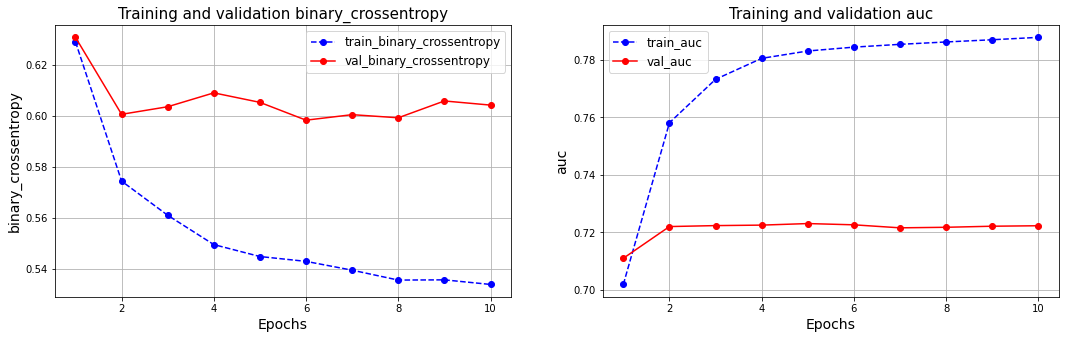

In [32]:
# 观察损失和准确率的变化
dfhistory = history.history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
plot_metric(dfhistory,"binary_crossentropy", ax1)
plot_metric(dfhistory,"auc", ax2)

In [41]:
device = 'cpu'
use_cuda = True
if use_cuda and torch.cuda.is_available():
    print('cuda ready...')
    device = 'cuda:0'

# model = DIN(dnn_feature_columns=feature_columns, history_feature_list=["movie_id"], task="binary")
model = DIEN(dnn_feature_columns=feature_columns, history_feature_list=["movie_id"]
             , use_negsampling=True
             , dnn_hidden_units=[4, 4, 4]
             , gru_type = "AUGRU"
             , dnn_dropout = 0.6
             , device=device
             , task = "binary"
            )
model

DIEN(
  (embedding_dict): ModuleDict(
    (user_id): Embedding(6040, 8)
    (movie_id): Embedding(3706, 8)
    (gender): Embedding(2, 8)
    (age): Embedding(7, 8)
    (occupation): Embedding(21, 8)
    (zip): Embedding(3439, 8)
  )
  (linear_model): Linear(
    (embedding_dict): ModuleDict()
  )
  (out): PredictionLayer()
  (interest_extractor): InterestExtractor(
    (gru): GRU(8, 8, batch_first=True)
    (auxiliary_net): DNN(
      (dropout): Dropout(p=0, inplace=False)
      (linears): ModuleList(
        (0): Linear(in_features=16, out_features=100, bias=True)
        (1): Linear(in_features=100, out_features=50, bias=True)
        (2): Linear(in_features=50, out_features=1, bias=True)
      )
      (activation_layers): ModuleList(
        (0): Sigmoid()
        (1): Sigmoid()
        (2): Sigmoid()
      )
    )
  )
  (interest_evolution): InterestEvolving(
    (attention): AttentionSequencePoolingLayer(
      (local_att): LocalActivationUnit(
        (dnn): DNN(
          (dropo

In [42]:
model.compile(optimizer="adam"
              , loss="binary_crossentropy"
              , metrics=["binary_crossentropy", "auc"]
             )

history = model.fit(X, y
                    , batch_size=512
                    , epochs=10
                    , shuffle=False
                    , verbose=1
                    , validation_split=0.2
                   )

0it [00:00, ?it/s]

cpu
Train on 800167 samples, validate on 200042 samples, 1563 steps per epoch


1563it [09:48,  2.66it/s]
0it [00:00, ?it/s]

Epoch 1/10
619s - loss:  0.6836 - binary_crossentropy:  0.6824 - auc:  0.5109 - val_binary_crossentropy:  0.6662 - val_auc:  0.6920


1563it [09:24,  2.77it/s]
0it [00:00, ?it/s]

Epoch 2/10
593s - loss:  0.6209 - binary_crossentropy:  0.6198 - auc:  0.7177 - val_binary_crossentropy:  0.6127 - val_auc:  0.7101


1563it [09:17,  2.80it/s]
0it [00:00, ?it/s]

Epoch 3/10
586s - loss:  0.5750 - binary_crossentropy:  0.5739 - auc:  0.7461 - val_binary_crossentropy:  0.6079 - val_auc:  0.7127


1563it [09:15,  2.81it/s]
0it [00:00, ?it/s]

Epoch 4/10
583s - loss:  0.5547 - binary_crossentropy:  0.5536 - auc:  0.7597 - val_binary_crossentropy:  0.6071 - val_auc:  0.7154


1563it [09:15,  2.81it/s]
0it [00:00, ?it/s]

Epoch 5/10
584s - loss:  0.5465 - binary_crossentropy:  0.5454 - auc:  0.7662 - val_binary_crossentropy:  0.6049 - val_auc:  0.7163


1563it [09:18,  2.80it/s]
0it [00:00, ?it/s]

Epoch 6/10
586s - loss:  0.5435 - binary_crossentropy:  0.5423 - auc:  0.7691 - val_binary_crossentropy:  0.6096 - val_auc:  0.7181


1563it [09:15,  2.81it/s]
0it [00:00, ?it/s]

Epoch 7/10
583s - loss:  0.5428 - binary_crossentropy:  0.5417 - auc:  0.7709 - val_binary_crossentropy:  0.6039 - val_auc:  0.7184


1563it [09:15,  2.81it/s]
0it [00:00, ?it/s]

Epoch 8/10
584s - loss:  0.5423 - binary_crossentropy:  0.5412 - auc:  0.7721 - val_binary_crossentropy:  0.6030 - val_auc:  0.7184


1563it [09:16,  2.81it/s]
0it [00:00, ?it/s]

Epoch 9/10
584s - loss:  0.5424 - binary_crossentropy:  0.5414 - auc:  0.7727 - val_binary_crossentropy:  0.6055 - val_auc:  0.7179


1563it [09:19,  2.79it/s]


Epoch 10/10
587s - loss:  0.5410 - binary_crossentropy:  0.5400 - auc:  0.7732 - val_binary_crossentropy:  0.6044 - val_auc:  0.7181


In [43]:
def plot_metric(dfhistory, metric, ax):
    """绘制评估曲线"""

    train_metrics = dfhistory[metric]
    val_metrics = dfhistory['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    ax.plot(epochs, train_metrics, 'bo--')
    ax.plot(epochs, val_metrics, 'ro-')
    ax.set_title('Training and validation '+ metric, fontsize=15)
    ax.set_xlabel("Epochs", fontsize=14)
    ax.set_ylabel(metric, fontsize=14)
    ax.legend(["train_" + metric, 'val_' + metric], fontsize=12)
    ax.grid()

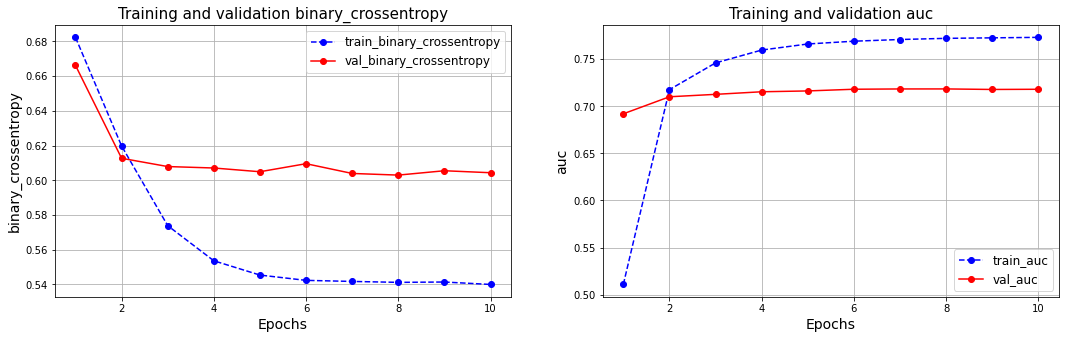

In [44]:
# 观察损失和准确率的变化
dfhistory = history.history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
plot_metric(dfhistory,"binary_crossentropy", ax1)
plot_metric(dfhistory,"auc", ax2)